<a href="https://colab.research.google.com/github/jyotishna/Bank-Customer-Churn/blob/main/05_NN_Layer_BackPropagation_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



- **BackPropagation**
  - [backpropagation](https://www.scaler.com/hire/test/problem/17679/)
  - [Backpropagation in MLP](https://www.scaler.com/hire/test/problem/19831/)
  - [Complete the code](https://www.scaler.com/hire/test/problem/19738/)
  - [Weight's value](https://www.scaler.com/hire/test/problem/20676/)




- **Code walkthrough**
    
    - [Calculate the loss](https://www.scaler.com/hire/test/problem/21618/) - H/W



- **MLP using sklearn**




## Backpropagation

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
df = pd.read_csv("/content/spiral.csv")

# Separating feature and label columns
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 27.4MB/s]


Now, let's get back to our NN network

<center><img src='https://drive.google.com/uc?id=1PWWndBIY0xFSxY7E06DEoTH9-JNuZryf' width="700"></center>



#### How'll computational graph look for above NN ?




<center><img src='https://drive.google.com/uc?id=1aAZ3E7rr0wh-y_V2lqL0m3XjpLmbs2da' width="700"></center>






### Forward Propagation

Now, we need to calculate $Z^2$,
- for this we multiply each row of X with each column of W1
- add bias to it (using broadcasting)


The formulation comes out to be:

$$X.W + b$$

In [ ]:
import numpy as np
# initialize parameters randomly
d = 2 # diensionality / number of inputs
n = 3 # Number of classes (A/B/C) / Number of neurons in output layer
h = 4 # neurons in hidden layer

Let;s intitialise these matrices randomly.

In [ ]:
W1 = 0.01 * np.random.randn(d,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,n)
b2 = np.zeros((1,n))

In [ ]:
Z1 = np.dot(X, W1) + b1 # (300,2) x (2,4) + (1,4) => (300,4)
A1 = np.maximum(0, Z1) # ReLU if Z1 < 0 A1 =0 else A1 = Z1

#### Calculation Z2 and A2

Now, in order to get shape of (300,3)
- we need to multiply $A^1$ with $W^2$ and add bias $b^2$ to it


In [ ]:
Z2 = np.dot(A1, W2) + b2  # (300, 4) x (4, 3) + (1, 3) => (300, 3)
# Applying softmax function to get A2
Z2_exp = np.exp(Z2)
A2 = Z2_exp/np.sum(Z2_exp, axis=1, keepdims=True)
probs = A2

- Notice that the only change from before is one extra line of code.
- We first compute the hidden layer representation and considered that as an input to the output layer.

<center><img src='https://drive.google.com/uc?id=1XOhwDbTokMed7Xg82bUXDd9L4H4vNZE3' width="700"></center>






### Loss

#### Question: Will the loss change?

No

### Backpropagation

#### Will the gradient calculation change?

No, but, we would have to backpropagate the gradients for one additional layer.

In [ ]:
# Number of training examples
m = y.shape[0] # 300 datapoints

#### Calculating dz2

<center><img src='https://drive.google.com/uc?id=1LTeDUnS2efPF07Ah2BRFyJccX1DsSeUt' width="700"></center>





$$dZ^2 = \frac{∂L}{∂Z^2}$$


So,

$$\frac{∂L}{∂Z^2} = \frac{∂L}{∂A^2}.\frac{∂A^2}{∂Z^2}$$

Here, $A^2$ is our output probabilities.
- Replaceing $A^2$ with $p$

$$\frac{∂L}{∂Z^2} = \frac{∂L}{∂p}.\frac{∂p}{∂Z^2}$$

#### Doesn't this look familiar ?

- This is similar to what we calculated previously i.e derivative of Loss w.r.t to Z

$$dz=\frac{\partial J}{\partial p} \frac{\partial p}{\partial z}$$

- The derivative came out to be : $dz = (p_i - I (i=y))$


Hence, $dZ_2 = (p_i - I (i=y))$




In [ ]:
dZ2 = probs
dZ2[range(m),y] -= 1

#### What will be the shape of dZ2 ?

As dZ2 is same as probabilties,
- its shape will be (m,3) or (300, 3)

#### Calculating $dW^2$ and $db^2$

Gradient calculation for $dW^2$ and $db^2$ will also be similar to $dW$ and $db$ in the softmax classifier case

<center><img src='https://drive.google.com/uc?id=1uLs3BG6wmrriUuOPkTPHbrqSQOA8B7U6' width="700"></center>





$$dW^2 = \frac{∂L}{∂W^2} = \frac{∂L}{∂A^2}.\frac{∂A^2}{∂Z^2}.\frac{∂Z^2}{∂W^2}$$

$$= dZ^2.\frac{∂Z^2}{∂W^2}$$

Here, $Z^2 = W^{2^{T}}.A^1 + b^2$

So, $\frac{∂Z^2}{∂W^2} = A^1$

$$dW^2 = \frac{∂L}{∂W^2} = dZ^2 . A^1$$




#### How to do mat mul for dW2  ?

- Shape of dZ2 = (300, 3)
- Shape of A1 = (300, 4)

#### What should be the shape of dW2 ?

We know that dW2 will be used for updating $W^2$
- its shape should match of $W^2$

Hence, shape of dW2 will be (4,3)



We have to multipy $dZ^2$ and $A^1$
- such that we get (4,3)

For that, we take a transpose of A1 and multiply it with dW2.

=> $A_1^T. dZ^2$ = (4, 300) x (300, 3) = (4, 3)

<center><img src='https://drive.google.com/uc?id=1JE6a4iXmFJO_Uno_OlUdccZ6hSMT4mGi' width="700"></center>



In [ ]:
# shape A1 => (300,4)  shape dZ2 (equal to probability)=> (300,3)
dW2 = np.dot(A1.T, dZ2)/m # shape => (4, 300) x (300, 3) => (4,3)

#### But, why are we dividing by m ?

Recall that in GD,
- as we are using all datapoints for calculating the updated w
    - we take average of it by dividing it by total number of datapoints

<center><img src='https://drive.google.com/uc?id=1d-Oqw5zbGhS3zin_mnycATtK3hOsPDvd' width="700"></center>


#### Where all do we need to divide by m ?
$ $
Our goal is to update weights and biases
- so we can either do with while calculating the derivates dW2, db2, dW1, db1 (like we are doing)
- or we can do it when updating the weights
    - i.e. $w^1 = w^1 - η.dw^1.\frac{1}{m}$

Similarly, we calculate db2

<center><img src='https://drive.google.com/uc?id=1ZOXIPvQUsnz8OwvooZ6LWTLKutDULdga' width="700"></center>






$$db^2 = \frac{∂L}{∂b^2} = \frac{∂L}{∂A^2}.\frac{∂A^2}{∂Z^2}.\frac{∂Z^2}{∂b^2}$$

Now,

$$\frac{∂Z^2}{∂b^2} = \frac{∂(W^2A^1 + b^2)}{db^2} = 1$$

$$db^2 = \frac{∂L}{∂b^2} = \frac{∂L}{∂A^2}.\frac{∂A^2}{∂Z^2}.1 = dZ^2$$


#### Question:  What will be the shape of db2 ?

We know that db2 will be used to update $b^2$
- so their shape should match

Hence, Shape of db2 = (1,3)

But, dZ2 shape is (300, 3)

Now, recall that we are doing GD not SGD.
- we need to sum up the derivates across across the rows and then average it out before using it for update


<center><img src='https://drive.google.com/uc?id=1ES5B4mTwP6hhAbo1-EZaMkaF4bupg06M' width="700"></center>




- So, we'll take the sum across the row

In [ ]:
db2 = np.sum(dZ2, axis=0, keepdims=True)/m # shape (1 ,3)

However, unlike earlier, we are not done yet, because $A^2$ is also a function of $Z^1$, and indirectly of ($W^1$ and $b^1$)
- We still need to calculate $dW^1$ and $db^1$
- So, we would need to calculate $dZ^1$, followed by $dW^1$ and $dW^2$

#### Calculating $dA^1$

<center><img src='https://drive.google.com/uc?id=1QLxk1Kaw-ZuEHt3jgUS7Ud7377IWt9kW' width="700"></center>







$$dA^1 = \frac{∂L}{∂A^1} = \frac{∂L}{∂A^2}.\frac{∂A^2}{∂Z^2}.\frac{∂Z^2}{∂A^1}$$


We know that, $$\frac{∂L}{∂A^2}.\frac{∂A^2}{∂Z^2} = dZ^2$$

Now,

$$\frac{∂Z^2}{∂A^1} = \frac{∂(W^2A^1 + b^2)}{dA^1} = W^2$$


$$dA^1 =\frac{∂L}{∂A^2}.\frac{∂A^2}{∂Z^2}.W^2 = dZ^2.W^2$$


#### What will be the shape of dA1?



<center><img src='https://drive.google.com/uc?id=13wUYyovmm6UTPVJ4asWfWdiBPkcvcf_A' width="700"></center>







Shape of $dA^1$ will be same as $A^1$ => (300, 4)



#### What will be the shape of $dZ^1$ ?
- Same as $Z^1$ => (300, 4)

#### What will be the matrix multiplication  then?

<center><img src='https://drive.google.com/uc?id=14JsUS-VrzKDeVScDMGOhR7b8DRJd6MII' width="700"></center>



Now that, we have all the shapes
- $dZ^2$ = (300, 3)
- $W^2$ = (4,3)

We need a final shape of (300, 4)

So, we will have to
- multiply dZ2 with transpose of $W^2$
- (300, 3) x (3, 4) => (300, 4)

$$dA^1 = dZ^2.W^{2^{T}}$$

In [ ]:
dA1 = np.dot(dZ2, W2.T) # (300,3) x (3 , 4) => (300, 4)

#### Calculating $dZ^1$

 Now, we have to pass back through the ReLU layer to calculate the gradient $dZ_1$

<center><img src='https://drive.google.com/uc?id=1A3ZdZS9a-1Ta-1Lk6xYGCVOCDbF0muNs' width="700"></center>







$$ \frac{∂L}{∂Z^1} = \frac{∂L}{∂A^2}.\frac{∂A^2}{∂Z^2}.\frac{∂Z^2}{∂A^1}.\frac{∂A^1}{∂Z^1}$$

We know that,

$$\frac{∂L}{∂A^2}.\frac{∂A^2}{∂Z^2}.\frac{∂Z^2}{∂A^1} = dA^1 $$


We have to calculate $\frac{∂A^1}{∂Z^1}$

<center><img src='https://drive.google.com/uc?id=1v2agZ0GS-iFu6HtLSTvlJzIU-IjpwtVh' width="700"></center>



<center><img src='https://drive.google.com/uc?id=1nSSN8JUfFjT2Fne9ioVd7NtvkiumIaXB' width="700"></center>



In [ ]:
dA1[Z1 <= 0] = 0 # was dA1[A1 <= 0] = 0. changed it to dA1[Z1 <= 0] = 0
dZ1 = dA1 # same shape as dA1 (300, 4)

#### But, why are we updating dA1 and not making a copy of it?

Ans: The purpose of calculating dA1 and dZ1 is to ultimately calculate dW1 and db1.

These are being used for intermediatory purpose.

So, making changes in dA1 won't change anything as
- we have already calculated dZ1
- and we won't be using dA1 anywhere else except for calc. of dZ1

This also means that we need to save the intermediate output values from the forward pass.

Finally, $dW^1$ and $db^1$ are calculated the same way we did earlier.

#### Calculating $dW^1$ and $db^1$

<center><img src='https://drive.google.com/uc?id=1_XYrgF622SovKGbrcvlP0Aqh5JKECL6U' width="700"></center>



<center><img src='https://drive.google.com/uc?id=1SX20lELZhhIvKS2u4o7E3NsVJaIOpBqN' width="700"></center>



$$ \frac{∂L}{∂W^1} = \frac{∂L}{∂A^2}.\frac{∂A^2}{∂Z^2}.\frac{∂Z^2}{∂A^1}.\frac{∂A^1}{∂Z^1}.\frac{∂Z^1}{∂W^1}$$

We know that,

$$\frac{∂L}{∂A^2}.\frac{∂A^2}{∂Z^2}.\frac{∂Z^2}{∂A^1}.\frac{∂A^1}{∂Z^1} = dZ^1 $$


We have to calculate $\frac{∂Z^1}{∂W^1}$

$$\frac{∂Z^1}{∂W^1} = \frac{∂(W^1.X + b^1)}{∂W^1} = X $$


So,

$$ \frac{∂L}{∂W^1} = dZ^1.X$$

Similarly, for $db^1$

<center><img src='https://drive.google.com/uc?id=1eEY30KJ_3NYX-kbhhXYz4dofWKvKWDZQ' width="700"></center>





$$ \frac{∂L}{∂b^1} = \frac{∂L}{∂A^2}.\frac{∂A^2}{∂Z^2}.\frac{∂Z^2}{∂A^1}.\frac{∂A^1}{∂Z^1}.\frac{∂Z^1}{∂b^1}$$

We know that,

$$\frac{∂L}{∂A^2}.\frac{∂A^2}{∂Z^2}.\frac{∂Z^2}{∂A^1}.\frac{∂A^1}{∂Z^1} = dZ^1 $$


We have to calculate $\frac{∂Z^1}{∂b^1}$

$$\frac{∂Z^1}{∂b^1} = \frac{∂(W^1.X + b^1)}{∂b^1} = 1 $$


So,

$$ \frac{∂L}{∂b^1} = dZ^1.1$$

In [ ]:
dW1 = np.dot(X.T, dZ1)/m # (2, 300) x (300 ,4) => (2, 4)
db1 = np.sum(dZ1, axis=0, keepdims=True)/m

Now that we've found these gradients, we update the weight and bias values as:-


In [ ]:
lr = 1e-0

In [ ]:
# perform a parameter update
W1 += -lr * dW1
b1 += -lr * db1
W2 += -lr * dW2
b2 += -lr * db2

This parameter updation is done untill it converges (error goes down).

#### Summarizing whole process

A single GD cycle for weight update looks like following :

<center><img src='https://drive.google.com/uc?id=1XfiVgAan0dhRloAFkWr8SLbKMVHk_3ww' width="700"></center>




Let's write all the derivatives

<center><img src='https://drive.google.com/uc?id=1YMOO4MkXGq80WsZsptjPPQB1-SeZ-jvF' width="500"></center>



Notice that,
- We use dZ2 for calculation of dW2, db2 and dA1.
- similarly, we use dA1 for calculation of dZ1.
- and dZ1 for calculation of dW1 and db1.

So, in order to not calculate value of deeper derivaties i.e dA1, dZ1 again and again
- we calculate and store the derivatives of deeper layer
- so as we can use them to calculate derivative of shallow layers

This is called as **memoization**
- also used in **dynamic programming**

#### Simplfying the single cycle of updation

<center><img src='https://drive.google.com/uc?id=1a7bjDa3R-2e7MShYCbPCqJ-m8R8lJM7_' width="700"></center>



While performing forward prop,
- we store/cache the value of $Z^j, W^j, b^j$ in order to use them during back prop
- For example: dA1 uses $w^2$ for its calculation.

Done! Let's put everything together.

In [ ]:
# initialize parameters randomly
d = 2
h = 100 # size of hidden layer
n = 3
W1 = 0.01 * np.random.randn(d,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,n)
b2 = np.zeros((1,n))

# some hyperparameters
lr = 1e-0
reg = 1e-3 # regularization strength
num_examples = X.shape[0]

for i in range(10000):

    # forward prop
    Z1 = np.dot(X, W1) + b1
    A1 = np.maximum(0, Z1)
    Z2 = np.dot(A1, W2) + b2
    Z2 = np.exp(Z2)
    A2 = Z2 / np.sum(Z2, axis=1, keepdims=True)
    probs = A2

    # calc. loss
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    # regularization
    loss = data_loss # adding reg. to loss
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # backprop
    # compute the gradient on scores
    dZ2 = probs
    dZ2[range(num_examples),y] -= 1
    dZ2 /= num_examples

    # first backprop into parameters W2 and b2
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    # next backprop into hidden layer, A1
    dA1 = np.dot(dZ2, W2.T)
    # backprop the ReLU non-linearity
    dA1[Z1 <= 0] = 0
    # finally into W,b
    dZ1 = dA1
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # add regularization gradient contribution


    # perform a parameter update
    W1 += -lr * dW1
    b1 += -lr * db1
    W2 += -lr * dW2
    b2 += -lr * db2

iteration 0: loss 1.098661
iteration 1000: loss 0.340004
iteration 2000: loss 0.266893
iteration 3000: loss 0.256200
iteration 4000: loss 0.253119
iteration 5000: loss 0.252083
iteration 6000: loss 0.251621
iteration 7000: loss 0.251314
iteration 8000: loss 0.251100
iteration 9000: loss 0.250901


#### NN class - all code wrapped as class

In [ ]:
class NN:

    def __init__(self, n_features, n_hidden, n_classes):
        self.d = n_features
        self.h = n_hidden
        self.n = n_classes
        self.W1 = 0.01 * np.random.randn(self.d, self.h)
        self.b1 = np.zeros((1,self.h))
        self.W2 = 0.01 * np.random.randn(self.h,self.n)
        self.b2 = np.zeros((1,self.n))

    def fwd_prop(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = np.maximum(0, Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        Z2 = np.exp(Z2)
        A2 = Z2 / np.sum(Z2, axis=1, keepdims=True)
        return A1, A2

    def cce_loss(self, y, probs):
        num_examples = y.shape[0]
        correct_logprobs = -np.log(probs[range(num_examples),y])
        loss = np.sum(correct_logprobs)/num_examples
        return loss

    def back_prop(self, X, A1, A2, y):
        # compute the gradient on scores
        num_examples = y.shape[0]
        dZ2 = A2
        dZ2[range(num_examples),y] -= 1
        dZ2 /= num_examples
        # first backprop into parameters W2 and b2
        dW2 = np.dot(A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        # next backprop into hidden layer, A1
        dA1 = np.dot(dZ2, self.W2.T)
        # backprop the ReLU non-linearity
        dA1[A1 <= 0] = 0
        # finally into W,b
        dZ1 = dA1
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        return dW1, db1, dW2, db2

    def fit(self, X, lr, reg, max_iters):
        num_examples = X.shape[0]
        for i in range(max_iters):
            #foward prop
            A1, A2 = self.fwd_prop(X)
            # calculate loss
            data_loss = self.cce_loss(y, A2)
            reg_loss = 0.5*reg*np.sum(self.W1*self.W1) + 0.5*reg*np.sum(self.W2*self.W2)
            loss = data_loss + reg_loss

            if i % 1000 == 0:
                print("iteration %d: loss %f" % (i, loss))

            dW1, db1, dW2, db2  = self.back_prop(X, A1, A2, y)

            # add regularization gradient contribution
            dW2 += reg * self.W2
            dW1 += reg * self.W1

            # perform a parameter update
            self.W1 += -lr * dW1
            self.b1 += -lr * db1
            self.W2 += -lr * dW2
            self.b2 += -lr * db2

    def predict(self, X):
        A1 = np.maximum(0, np.dot(X, self.W1) + self.b1) # ReLU(Z1) = ReLU(W1T. X + b1)
        Z2 = np.dot(A1, self.W2) + self.b2 # Z2 = W2T.A1 + b2 => 3 probab
        y_hat = np.argmax(Z2, axis=1) # taking index of max probab
        return y_hat

nn_model = NN(n_features=2, n_hidden=100, n_classes=3)
nn_model.fit(X, lr=1, reg=1e-3, max_iters=10000)
print('training accuracy: %.2f' % (np.mean(nn_model.predict(X) == y)))

iteration 0: loss 1.098567
iteration 1000: loss 0.397011
iteration 2000: loss 0.266143
iteration 3000: loss 0.253787
iteration 4000: loss 0.252140
iteration 5000: loss 0.251514
iteration 6000: loss 0.251190
iteration 7000: loss 0.250905
iteration 8000: loss 0.250834
iteration 9000: loss 0.250677
training accuracy: 0.99


In [ ]:
from matplotlib import pyplot as plt

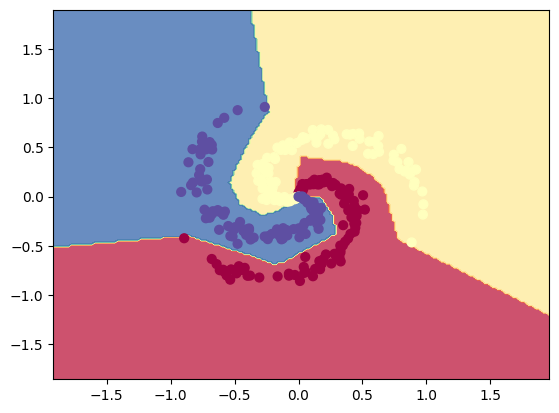

In [ ]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid

y_hat = nn_model.predict(np.c_[xx.ravel(), yy.ravel()])
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

---

## Training a NN using sklearn - Multi layer perceptron (MLP)

As mentioned earlier, each unit of a NN is also called as perceptron, NN is called as MLP

sklearn MLPClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs',
                    alpha=1e-5,
                    hidden_layer_sizes=(100),
                    random_state=100,
                    activation='relu',
                    max_iter=200)
mlp.fit(X, y)
print(mlp.score(X, y))

0.9933333333333333


In [ ]:
len(mlp.coefs_)

2

In [ ]:
len(mlp.intercepts_)

2

In [ ]:
mlp.loss_

0.012061771596620623

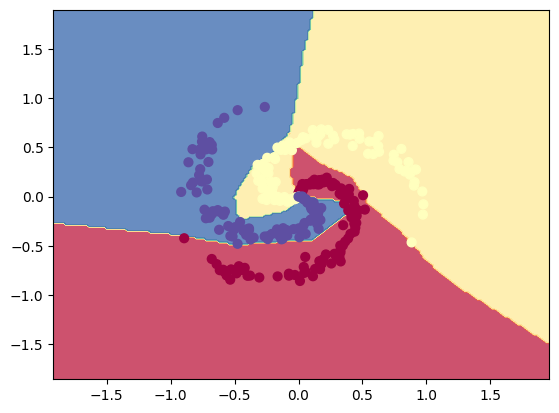

In [ ]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid
y_hat = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

Till now, we saw how to solve classification using NN.

#### Question: Can we use Neural Networks for Regression task?



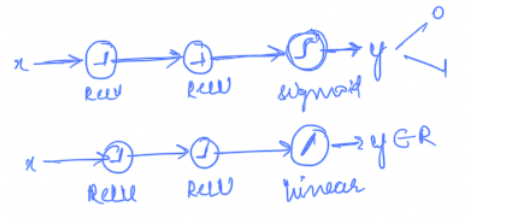


If the last neuron in chain is:
- Linear --> then NeuralNet will do regression. Ex: y = x
        --W1--(S)--W2--(S)--W3--(/)--
- Probabilistic (Sigmoid/softmax) --> NeuralNet will do classification. Ex: y = sig(x)
        --W1--(S)--W2--(S)--W3--(S)--
        
<br>

#### Question: What about activations of intermediate layers? Should that be linear too?

No, then, NN wouldn't be able to create high order complex features

As discussed earlier, the activations in intermediate layers should always be non-linear.

In the next class, we will study a popular framework to called Tensorflow which will be helpful in working with various other kinds of Neural Networks

In [ ]:
Tensorflow and Pytorch